In [ ]:
# Imports used in this notebook. This is Python 3 on Jupyter with matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt
import random
from itertools   import permutations, combinations
from functools   import lru_cache as cache
from collections import Counter
from statistics  import mean, median
import pandas as pd
import time


In [ ]:
def alltours(cities):
    "Return a list of non-redundant tours (permutations of cities)."
    start, *others = cities
    return [[start] + Tour(perm) for perm in permutations(others)]
    
Tour = list  # A Tour is a list of cities

In [ ]:
def exhaustive_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key=tour_length)

# TO DO: Data types: City, Cities, Tour; Functions: alltours, tour_length

In [ ]:
def tour_length(tour):
    """The total of distances between each pair of consecutive cities in the tour.
    This includes the last-to-first, distance(tour[-1], tour[0])"""
    return sum(distance(tour[i - 1], tour[i]) 
               for i in range(len(tour)))

City = complex

def distance(A, B): return abs(A - B)

def Cities(n, seed=391, width=999, height=666):
    "Make a set of n cities, sampled uniformly from a (width x height) rectangle."
    random.seed((n, seed))
    return frozenset(City(random.randint(1, width), random.randint(1, height))
                     for c in range(n))

In [ ]:
def plot_tour(tour, style='bo-'): 
    "Plot every city and link in the tour, and highlight start city."
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    plot_segment(tour + start, style)
    plot_segment(start, 'rD') # start city is red Diamond.
    
def plot_segment(segment, style='bo-'):
    "Plot every city and link in the segment."
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('on')
    
def X(city): "X coordinate."; return city.real
def Y(city): "Y coordinate."; return city.imag

In [ ]:
def do(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the result, and print info."
    t0 = time.process_time()
    tour = algorithm(cities)
    t1 = time.process_time()
    assert Counter(tour) == Counter(cities) # Every city appears exactly once in tour
    plot_tour(tour)
    plt.text(x=461,y=295,s="City A",fontsize=10)
    plt.text(x=471,y=19,s="City B",fontsize=10)
    plt.text(x=631,y=636,s="City C",fontsize=10)
    plt.text(x=734,y=292,s="City D",fontsize=10)
    plt.text(x=74,y=79,s="City E",fontsize=10)
    print("{}: {} cities ⇒ tour length {:.0f} (in {:.3f} sec)".format(
          name(algorithm), len(tour), tour_length(tour), t1 - t0))
    
def name(algorithm): return algorithm.__name__.replace('_tsp', '')

In [ ]:
Cities(5)

frozenset({(461+295j), (471+19j), (631+636j), (734+292j), (74+79j)})

In [ ]:
ALL_PATHS=alltours(Cities(5))
ALL_PATHS

[[(461+295j), (734+292j), (631+636j), (471+19j), (74+79j)],
 [(461+295j), (734+292j), (631+636j), (74+79j), (471+19j)],
 [(461+295j), (734+292j), (471+19j), (631+636j), (74+79j)],
 [(461+295j), (734+292j), (471+19j), (74+79j), (631+636j)],
 [(461+295j), (734+292j), (74+79j), (631+636j), (471+19j)],
 [(461+295j), (734+292j), (74+79j), (471+19j), (631+636j)],
 [(461+295j), (631+636j), (734+292j), (471+19j), (74+79j)],
 [(461+295j), (631+636j), (734+292j), (74+79j), (471+19j)],
 [(461+295j), (631+636j), (471+19j), (734+292j), (74+79j)],
 [(461+295j), (631+636j), (471+19j), (74+79j), (734+292j)],
 [(461+295j), (631+636j), (74+79j), (734+292j), (471+19j)],
 [(461+295j), (631+636j), (74+79j), (471+19j), (734+292j)],
 [(461+295j), (471+19j), (734+292j), (631+636j), (74+79j)],
 [(461+295j), (471+19j), (734+292j), (74+79j), (631+636j)],
 [(461+295j), (471+19j), (631+636j), (734+292j), (74+79j)],
 [(461+295j), (471+19j), (631+636j), (74+79j), (734+292j)],
 [(461+295j), (471+19j), (74+79j), (734+

In [ ]:
Distances=[]
for i in range(0,24):
  Distances.append(tour_length(ALL_PATHS[i]))

In [ ]:
df = pd.DataFrame(list(zip(ALL_PATHS,Distances )),
               columns =['ALL PATHS', 'Tour Distances'])
#from google.colab import files
#df.to_csv('output.csv', encoding = 'utf-8-sig') 
#files.download('output.csv')
df

,ALL PATHS,Tour Distances
0,"[(461+295j), (734+292j), (631+636j), (471+19j)...",2114.220648
1,"[(461+295j), (734+292j), (631+636j), (74+79j),...",2097.512069
2,"[(461+295j), (734+292j), (471+19j), (631+636j)...",2520.415261
3,"[(461+295j), (734+292j), (471+19j), (74+79j), ...",2222.343279
4,"[(461+295j), (734+292j), (74+79j), (631+636j),...",2667.841856
5,"[(461+295j), (734+292j), (74+79j), (471+19j), ...",2386.478453
6,"[(461+295j), (631+636j), (734+292j), (471+19j)...",1963.897569
7,"[(461+295j), (631+636j), (734+292j), (74+79j),...",2111.324163
8,"[(461+295j), (631+636j), (471+19j), (734+292j)...",2534.227356
9,"[(461+295j), (631+636j), (471+19j), (74+79j), ...",2386.478453


Παραγωγή Dataframe με στήλη 1 όλες τις δυνατές διαδρομές και στήλη 2 την απόσταση της κάθε διαδρομής. Ο Κώδικας στα σχόλια κατεβάζει το dataframe σε μορφή csv

In [ ]:
exhaustive_tsp(Cities(5))

[(461+295j), (631+636j), (734+292j), (471+19j), (74+79j)]

exhaustive: 5 cities ⇒ tour length 1964 (in 0.000 sec)


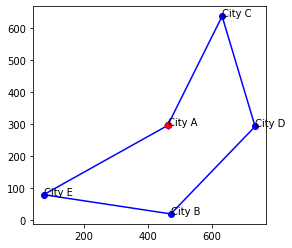

In [ ]:
do(exhaustive_tsp,Cities(5))

In [ ]:
for i in range(3,14):
  t0 = time.process_time()
  exhaustive_tsp(Cities(i))
  t1 = time.process_time()
  print(i,(t1-t0))

3 0.0023188670000000577
4 9.36259999999578e-05
5 0.00016320099999989068
6 0.0006902250000000443
7 0.0041794610000001065
8 0.03416488200000023
9 0.286785348
10 3.301984285
11 23.641164623999998
12 236.08435931699998
13 2832.29182
